In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("../data/raw/vaderoarna_wr.csv", skiprows=10, sep=';', usecols=[0,1,7,13], parse_dates=True, index_col=0)

In [3]:
df.head()

,"Våghöjd, signifikant 30 min","Vågperiod, medelvärde 30 min",Vågriktning vid Tp (energimax 30 min)
Datum Tid (UTC),,,
2005-03-02 16:00:00,0.38,2.74,NaN
2005-03-02 17:00:00,0.39,2.68,NaN
2005-03-02 18:00:00,0.42,2.65,78.75
2005-03-02 19:00:00,0.42,2.67,95.63
2005-03-02 20:00:00,0.36,2.60,NaN


In [4]:
df.columns = ["hs","tp","mwd"]
df.head()

,hs,tp,mwd
Datum Tid (UTC),,,
2005-03-02 16:00:00,0.38,2.74,NaN
2005-03-02 17:00:00,0.39,2.68,NaN
2005-03-02 18:00:00,0.42,2.65,78.75
2005-03-02 19:00:00,0.42,2.67,95.63
2005-03-02 20:00:00,0.36,2.60,NaN


<AxesSubplot:xlabel='Datum Tid (UTC)'>

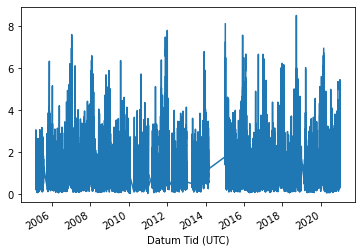

In [5]:
df['hs'].plot()

Select contiguous periods, i.e. without long data gaps

In [6]:
train_df = df["2007-07-01":"2009-12-31"]
val_df = df["2012-04-01":"2012-12-31"]
test_df = df["2016-01-01":"2018-12-31"]

In [7]:
train_df = train_df.dropna().resample('H').interpolate()
val_df = val_df.dropna().resample('H').interpolate()
test_df = test_df.dropna().resample('H').interpolate()

<AxesSubplot:xlabel='Datum Tid (UTC)'>

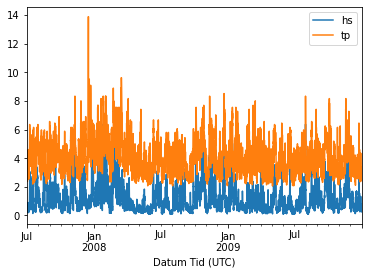

In [8]:
train_df[['hs','tp']].plot()

<AxesSubplot:xlabel='Datum Tid (UTC)'>

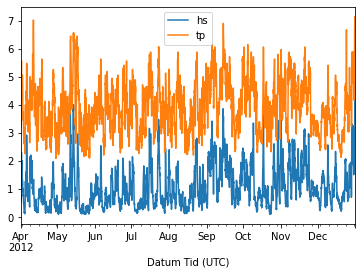

In [9]:
val_df[['hs','tp']].plot()

<AxesSubplot:xlabel='Datum Tid (UTC)'>

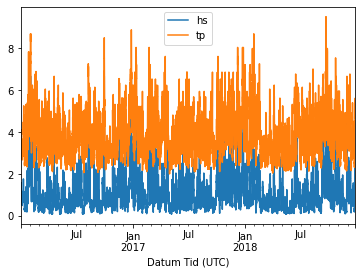

In [10]:
test_df[['hs','tp']].plot()

In [11]:
train_df.head()

,hs,tp,mwd
Datum Tid (UTC),,,
2007-07-01 00:00:00,0.60,4.00,236.25
2007-07-01 01:00:00,0.58,3.92,241.88
2007-07-01 02:00:00,0.59,3.88,247.50
2007-07-01 03:00:00,0.67,3.85,241.88
2007-07-01 04:00:00,0.70,4.12,247.50


In [12]:
train_df.to_csv("../data/final/train.csv")
val_df.to_csv("../data/final/val.csv")
test_df.to_csv("../data/final/test.csv")